### Activate the auto-reload

In [2]:
%load_ext autoreload
%autoreload 2

### Import the libraries

In [3]:
import sys
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Set file path to parent directory

In [4]:
sys.path.append(str(Path().resolve().parent / "src"))
os.chdir("../")

### Import the homemade functions

In [5]:
from src.data.data_import import DataImporter

### Get the API keys to access UN data

How-to available at this address: [https://uncomtrade.org/docs/api-subscription-keys/](https://uncomtrade.org/docs/api-subscription-keys/)

In [6]:
UN_API_KEY = "<0168d9d32ce44692bb6abe6e9fb5d8f5"

# Import the data

In [7]:
importer = DataImporter(api_key=UN_API_KEY)
df = importer.get_merged_data()
df.head(2)

Reading merged data from: /Users/wanonnoiqtyider/Documents/GitHub/graspp-25S-trade/data/interim/merge.csv


,,Export,Import,ILO
country,year,,,
ABW,2010,124523218.0,1.071034e+09,6.738
AFG,2014,570534007.0,7.697178e+09,1389.950


In [ ]:
print(df.columns)

Index(['Export', 'Import', 'ILO'], dtype='object')


In [13]:
countries = df.index.get_level_values('country').unique()
print(sorted(countries))

print(f"Number of countries: {len(countries)}")


['ABW', 'AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CYM', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KEN', 'KGZ', 'KHM', 'KIR', 'KOR', 'LAO', 'LBN', 'LBR', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MSR', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SDN', 'SEN', 'SGP', 'SLB', 'SLE', 'SLV', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYC'

In [22]:
!pip install pycountry
import pycountry


# Create the mapping dictionary
code_to_name = {
    code: pycountry.countries.get(alpha_3=code).name if pycountry.countries.get(alpha_3=code) else "Unknown"
    for code in df.index.get_level_values('country').unique()
}

# Convert the index to a DataFrame and assign the country name
df = df.reset_index()
df['country_name'] = df['country'].map(code_to_name)

# If needed, set the index back
df = df.set_index(['country', 'year'])

# Preview
print(df.head())

import pycountry

# Step 1: Create mapping from ISO code to country name
code_to_name = {
    code: pycountry.countries.get(alpha_3=code).name if pycountry.countries.get(alpha_3=code) else "Unknown"
    for code in df.index.get_level_values('country').unique()
}

# Step 2: Reset index so 'country' and 'year' become columns
df = df.reset_index()

# Step 3: Map country names
df['country_name'] = df['country'].map(code_to_name)

# Step 4: Reorder columns so 'country_name' comes after 'country'
cols = df.columns.tolist()
country_idx = cols.index('country')
# Remove 'country_name' and insert it after 'country'
cols.insert(country_idx + 1, cols.pop(cols.index('country_name')))
df = df[cols]

# Optional: Set index back if needed
# df = df.set_index(['country', 'year'])

# Display result
print(df.head())




[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
                    Export        Import       ILO country_name
country year                                                   
ABW     2010  1.245232e+08  1.071034e+09     6.738        Aruba
AFG     2014  5.705340e+08  7.697178e+09  1389.950  Afghanistan
        2017  8.319268e+08  7.792600e+09  1122.933  Afghanistan
AGO     2004  1.325368e+10  5.072076e+09   406.676       Angola
        2009  4.063941e+10  2.391885e+10   432.430       Angola
  country country_name  year        Export        Import       ILO
0     ABW        Aruba  2010  1.245232e+08  1.071034e+09     6.738
1     AFG  Afghanistan  2014  5.705340e+08  7.697178e+09  1389.950
2     AFG  Afghanistan  2017  8.319268e+08  7.792600e+09  1122.933
3     AGO       Angola  2004  1.325368e+10  5.072076e+09   406.676
4     AGO       Angola  2009  4.063941e+10  2.391885e+10   432.430


In [23]:
# Define commonly accepted developed countries by ISO alpha-3 codes (based on OECD, World Bank etc.)
developed_countries = {
    'USA', 'CAN', 'GBR', 'FRA', 'DEU', 'JPN', 'ITA', 'AUS', 'KOR', 'ESP', 'NLD', 'CHE', 'SWE', 'NOR', 'DNK',
    'FIN', 'ISL', 'AUT', 'BEL', 'IRL', 'NZL', 'SGP', 'LUX', 'PRT', 'GRC', 'SVN', 'SVK', 'CZE', 'EST', 'LVA', 'LTU',
    'ISR', 'HKG'
}

# Assign each country to 'Developed' or 'Developing'
df['country_class'] = df['country'].apply(lambda x: 'Developed' if x in developed_countries else 'Developing')

# Move 'country_class' column next to 'country_name'
cols = df.columns.tolist()
cols.insert(country_idx + 2, cols.pop(cols.index('country_class')))
df = df[cols]

# Preview the result
df.head()


,country,country_name,country_class,year,Export,Import,ILO
0,ABW,Aruba,Developing,2010,1.245232e+08,1.071034e+09,6.738
1,AFG,Afghanistan,Developing,2014,5.705340e+08,7.697178e+09,1389.950
2,AFG,Afghanistan,Developing,2017,8.319268e+08,7.792600e+09,1122.933
3,AGO,Angola,Developing,2004,1.325368e+10,5.072076e+09,406.676
4,AGO,Angola,Developing,2009,4.063941e+10,2.391885e+10,432.430


In [25]:
#Regression for Developed Nations: Export ~ ILO
import statsmodels.formula.api as smf

# Filter for developed nations and drop NA values in relevant columns
df_dev = df[df['country_class'] == 'Developed'].dropna(subset=['Export', 'ILO'])

# Run the regression
model_dev = smf.ols('Export ~ ILO', data=df_dev).fit()

# Display summary
print("Regression Results for Developed Nations (Export ~ ILO):")
print(model_dev.summary())


Regression Results for Developed Nations (Export ~ ILO):
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1365.
Date:                Tue, 27 May 2025   Prob (F-statistic):          7.06e-168
Time:                        12:20:16   Log-Likelihood:                -19672.
No. Observations:                 716   AIC:                         3.935e+04
Df Residuals:                     714   BIC:                         3.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [26]:
#Regression for Developing Nations: Export ~ ILO
# Filter for developing nations and drop NA values in relevant columns
df_deving = df[df['country_class'] == 'Developing'].dropna(subset=['Export', 'ILO'])

# Run the regression
model_deving = smf.ols('Export ~ ILO', data=df_deving).fit()

# Display summary
print("\nRegression Results for Developing Nations (Export ~ ILO):")
print(model_deving.summary())



Regression Results for Developing Nations (Export ~ ILO):
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     548.0
Date:                Tue, 27 May 2025   Prob (F-statistic):          5.45e-100
Time:                        12:20:46   Log-Likelihood:                -31618.
No. Observations:                1192   AIC:                         6.324e+04
Df Residuals:                    1190   BIC:                         6.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Regression Results for Developed Nations (Export ~ ILO):
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1365.
Date:                Tue, 27 May 2025   Prob (F-statistic):          7.06e-168
Time:                        12:24:07   Log-Likelihood:                -19672.
No. Observations:                 716   AIC:                         3.935e+04
Df Residuals:                     714   BIC:                         3.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

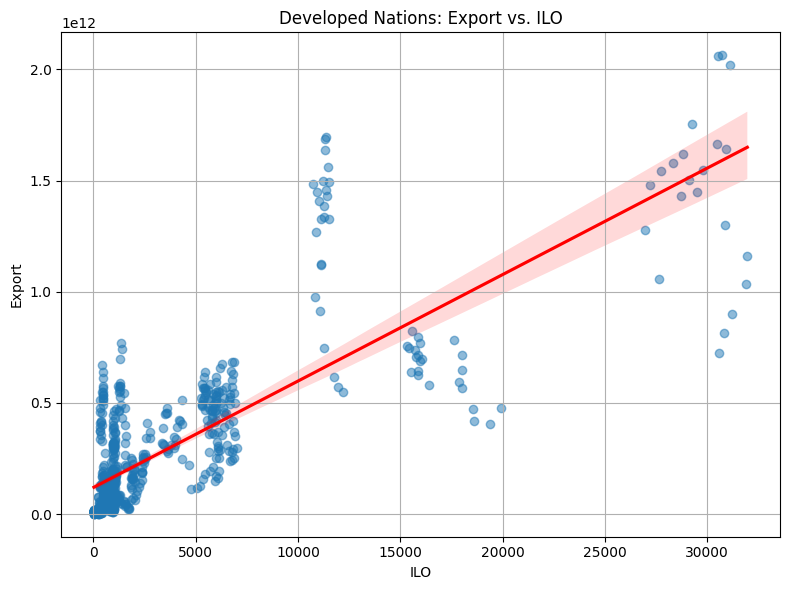

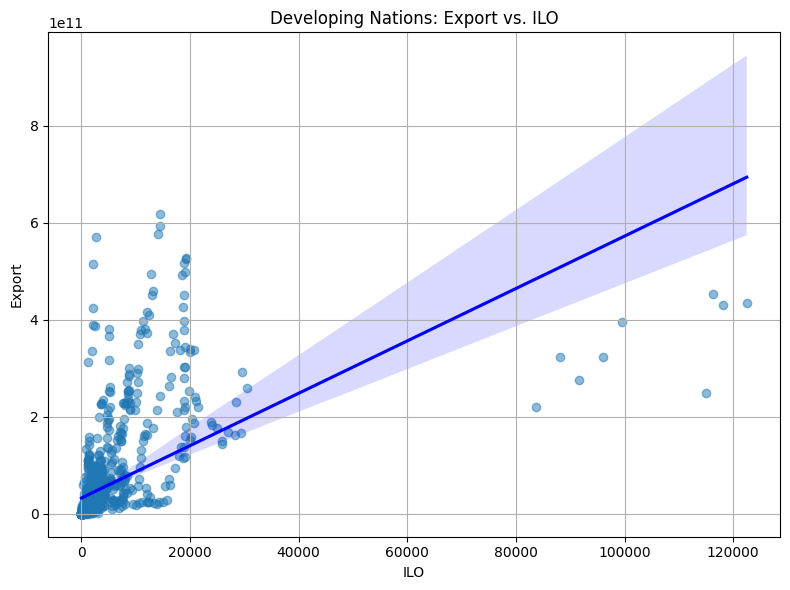

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Filter for developed nations and drop NA values
df_dev = df[df['country_class'] == 'Developed'].dropna(subset=['Export', 'ILO'])

# Filter for developing nations and drop NA values
df_deving = df[df['country_class'] == 'Developing'].dropna(subset=['Export', 'ILO'])

# Run regression for developed nations
model_dev = smf.ols('Export ~ ILO', data=df_dev).fit()
print("Regression Results for Developed Nations (Export ~ ILO):")
print(model_dev.summary())

# Run regression for developing nations
model_deving = smf.ols('Export ~ ILO', data=df_deving).fit()
print("\nRegression Results for Developing Nations (Export ~ ILO):")
print(model_deving.summary())

# Plot for Developed Nations
plt.figure(figsize=(8, 6))
sns.regplot(data=df_dev, x='ILO', y='Export', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Developed Nations: Export vs. ILO')
plt.xlabel('ILO')
plt.ylabel('Export')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Developing Nations
plt.figure(figsize=(8, 6))
sns.regplot(data=df_deving, x='ILO', y='Export', scatter_kws={'alpha': 0.5}, line_kws={"color": "blue"})
plt.title('Developing Nations: Export vs. ILO')
plt.xlabel('ILO')
plt.ylabel('Export')
plt.grid(True)
plt.tight_layout()
plt.show()